# Problem Statement
The data-set of students of college from different sectors is given, with its use predicting whether the student possess entrepreneurial skills or not.

This dataset consist 16 features and a target variable.

## Importing all the required Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [4]:
df.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

In [6]:
df.shape

(219, 17)

In [7]:
df.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

In [8]:
df.drop(columns=['ReasonsForLack'], inplace=True, axis=1)

## EDA

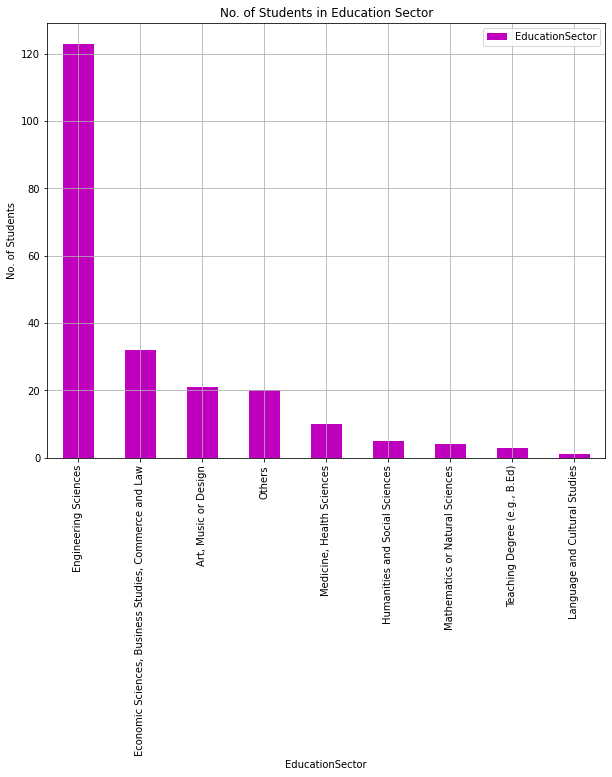

In [9]:
plt.figure(figsize=(10,8))
df.EducationSector.value_counts().plot.bar(color="m")
plt.xlabel("EducationSector")
plt.ylabel("No. of Students")
plt.title("No. of Students in Education Sector")
plt.legend()
plt.grid()
plt.show()

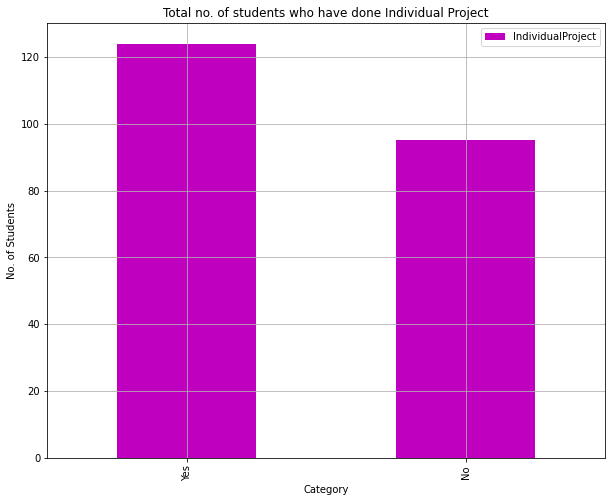

In [10]:
plt.figure(figsize=(10,8))
df.IndividualProject.value_counts().plot.bar(color="m")
plt.xlabel("Category")
plt.ylabel("No. of Students")
plt.title("Total no. of students who have done Individual Project")
plt.legend()
plt.grid()
plt.show()

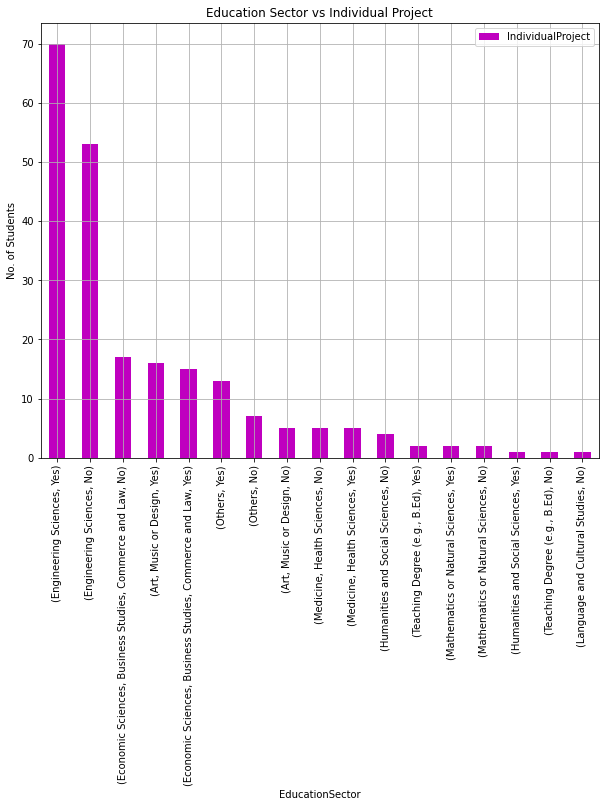

In [51]:
plt.figure(figsize=(10,8))
df.groupby(["EducationSector","IndividualProject"])["IndividualProject"].count().sort_values(ascending=False).plot.bar(color="m")
plt.ylabel("No. of Students")
plt.xlabel("EducationSector")
plt.legend()
plt.grid()
plt.title("Education Sector vs Individual Project")
plt.show()

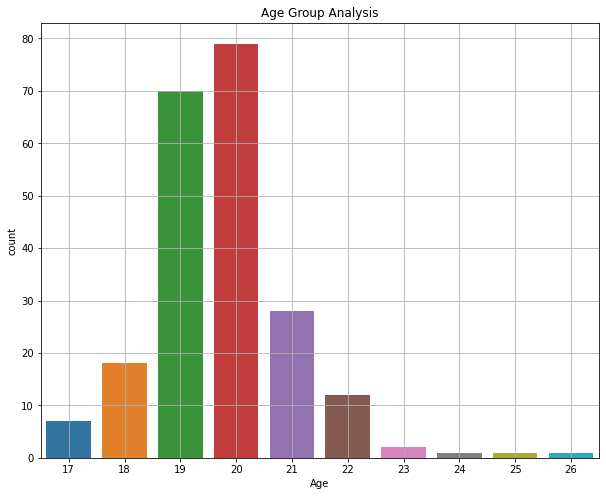

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(df.Age)
plt.title("Age Group Analysis")
plt.grid()

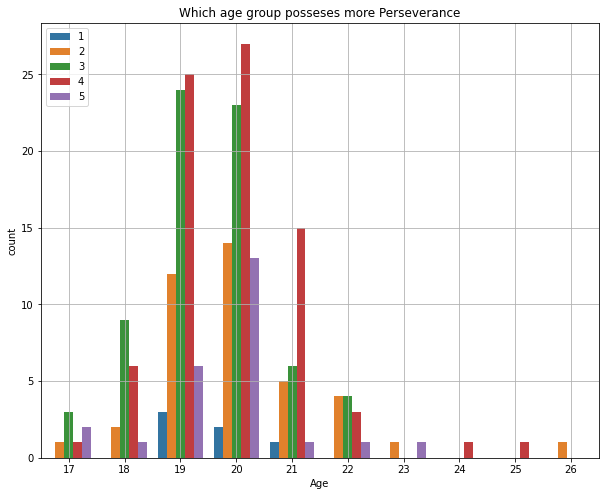

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x="Age", data=df, hue="Perseverance")
plt.title("Which age group posseses more Perseverance")
plt.grid()
plt.legend()

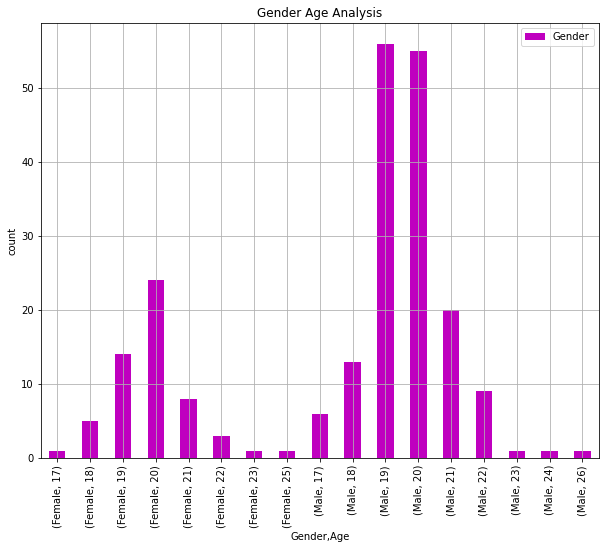

In [14]:
plt.figure(figsize=(10,8))
df.groupby(['Gender', 'Age'])['Gender'].count().plot.bar(color='m')
plt.ylabel('count')
plt.title("Gender Age Analysis")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Where students reside')

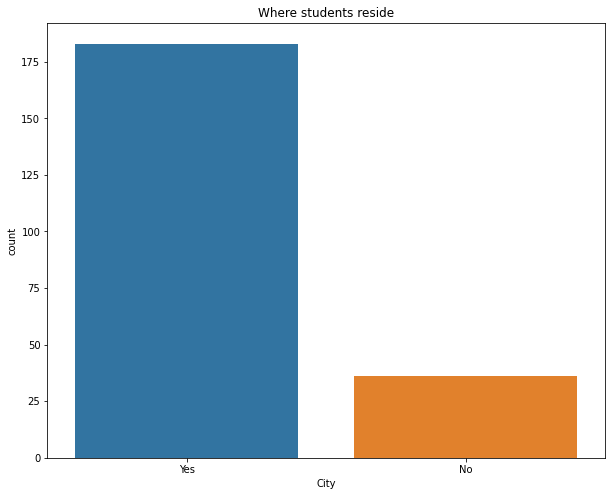

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x="City", data=df)
plt.title("Where students reside")

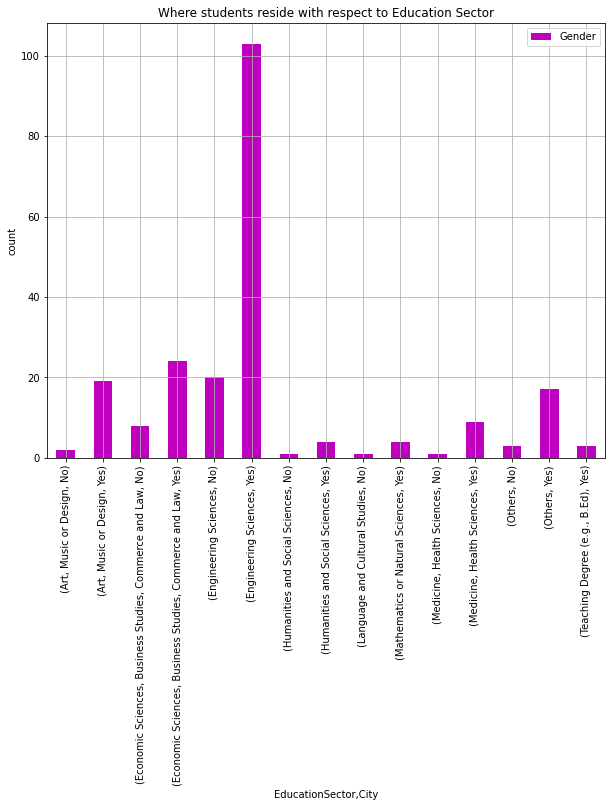

In [16]:
plt.figure(figsize=(10,8))
df.groupby(["EducationSector","City"])['Gender'].count().plot.bar(color="m")
plt.ylabel("count")
plt.title("Where students reside with respect to Education Sector")
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'At what age more students got influenced?')

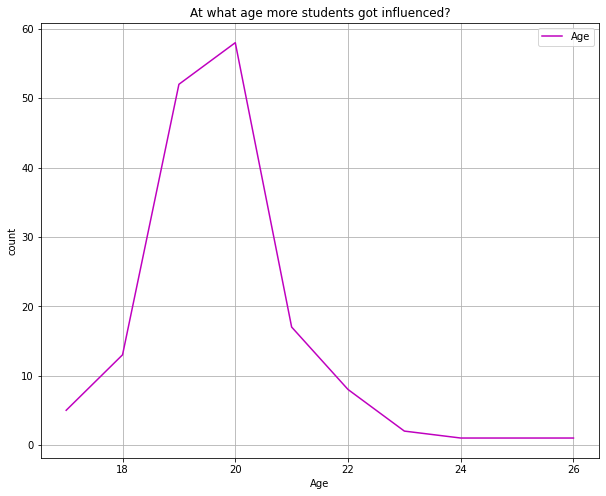

In [17]:
plt.figure(figsize=(10,8))
studentsInfluenced = df[df["Influenced"]=="Yes"]["Age"]
studentsInfluenced.value_counts().sort_index().plot.line(color="m")
plt.xlabel("Age")
plt.ylabel("count")
plt.legend()
plt.grid()
plt.title("At what age more students got influenced?")

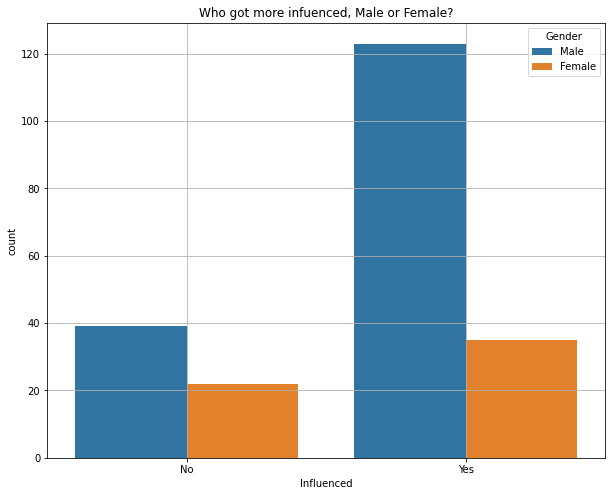

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x="Influenced", data=df, hue="Gender")
plt.xlabel("Influenced")
plt.title("Who got more infuenced, Male or Female?")
plt.grid()

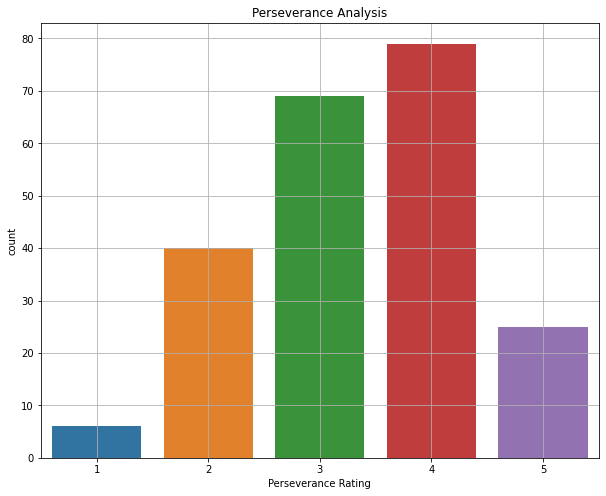

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x="Perseverance", data=df)
plt.xlabel("Perseverance Rating")
plt.title("Perseverance Analysis")
plt.grid()

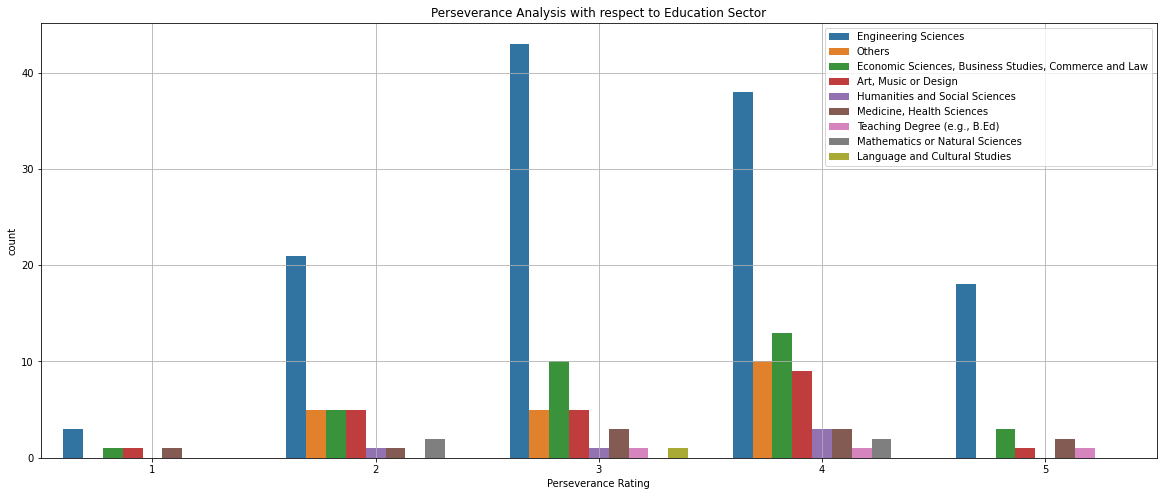

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(x="Perseverance", data=df, hue="EducationSector")
plt.xlabel("Perseverance Rating")
plt.title("Perseverance Analysis with respect to Education Sector")
plt.legend(loc="upper right")
plt.grid()

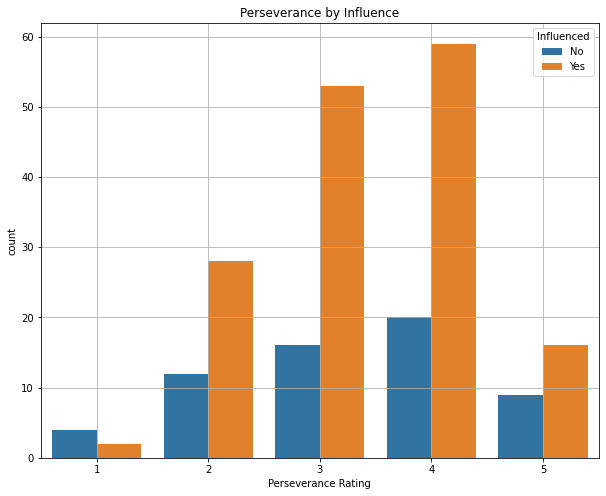

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x="Perseverance", data=df, hue="Influenced")
plt.xlabel("Perseverance Rating")
plt.title("Perseverance by Influence")
plt.grid()

In [22]:
df

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engineering Sciences,Yes,19,Male,Yes,Yes,4,5,4,3,4,4,5,Yes,Positivity,1
215,Engineering Sciences,Yes,19,Male,Yes,No,2,2,2,2,2,2,2,No,Work Ethic,0
216,Engineering Sciences,Yes,22,Female,Yes,Yes,3,4,4,3,4,4,3,No,Vision,1
217,Engineering Sciences,No,19,Male,Yes,No,1,2,2,3,3,2,2,No,Passion,0


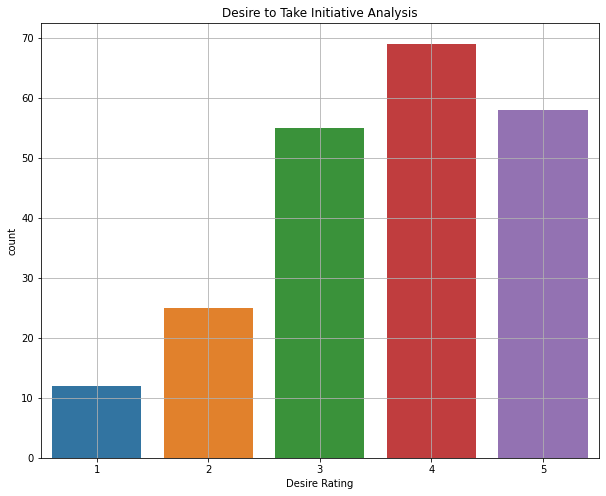

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x="DesireToTakeInitiative", data=df)
plt.xlabel("Desire Rating")
plt.title("Desire to Take Initiative Analysis")
plt.grid()

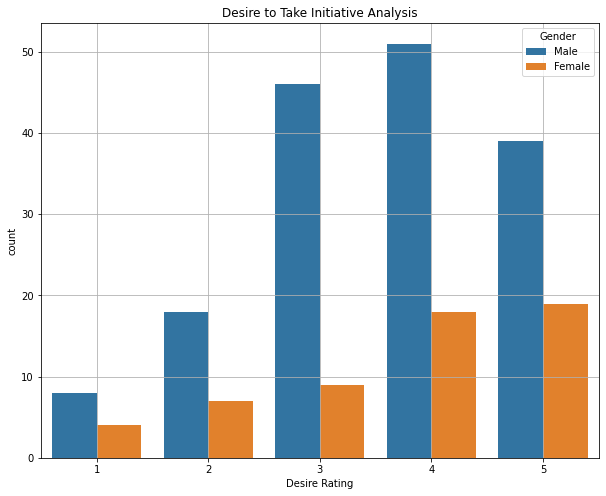

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x="DesireToTakeInitiative", data=df, hue=df.Gender)
plt.xlabel("Desire Rating")
plt.title("Desire to Take Initiative Analysis")
plt.grid()

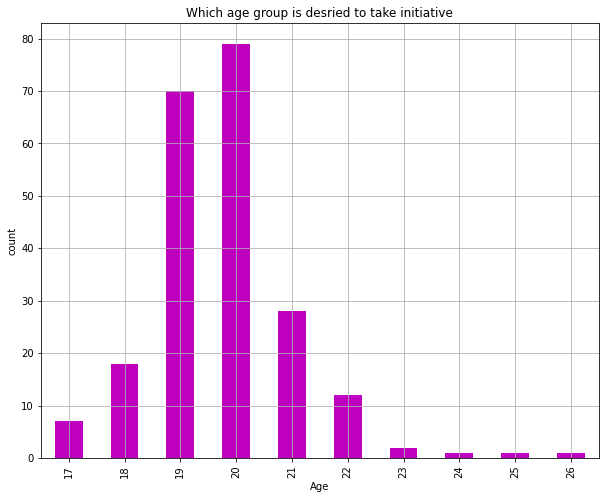

In [25]:
plt.figure(figsize=(10,8))
df.groupby(['Age',"DesiredToTakeInitiative"])['DesireToTakeInitiative'].count().plot.bar(color="m")
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Which age group is desried to take initiative")
plt.grid()

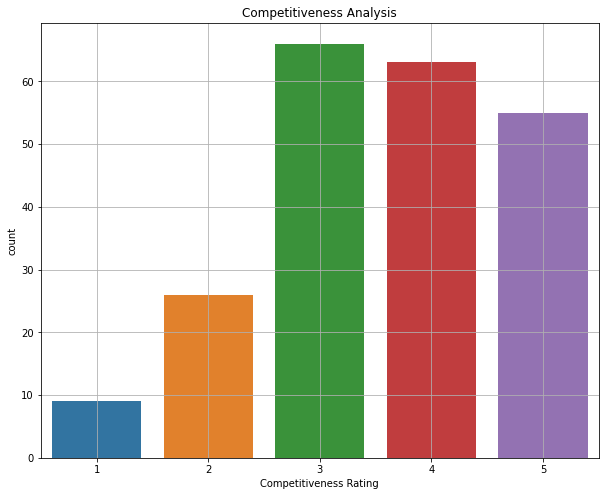

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x="Competitiveness", data=df)
plt.xlabel("Competitiveness Rating")
plt.title("Competitiveness Analysis")
plt.grid()

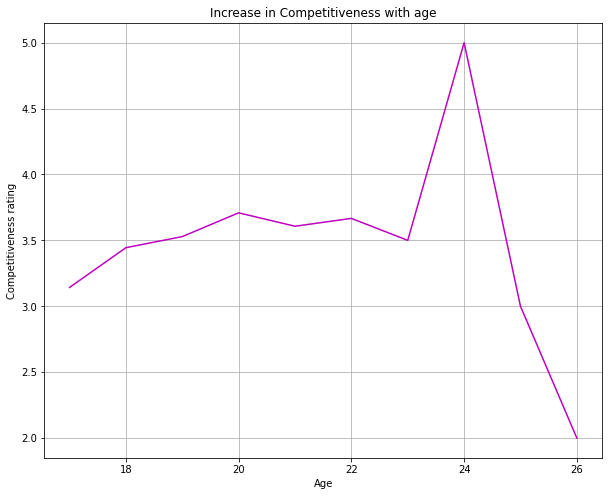

In [27]:
plt.figure(figsize=(10,8))
df.groupby(['Age'])["Competitiveness"].mean().plot.line(color="m")
plt.xlabel("Age")
plt.ylabel("Competitiveness rating")
plt.title("Increase in Competitiveness with age")
plt.grid()

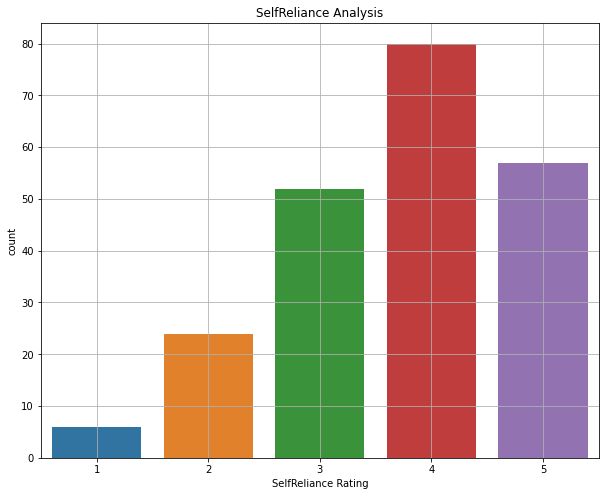

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x="SelfReliance", data=df)
plt.xlabel("SelfReliance Rating")
plt.title("SelfReliance Analysis")
plt.grid()

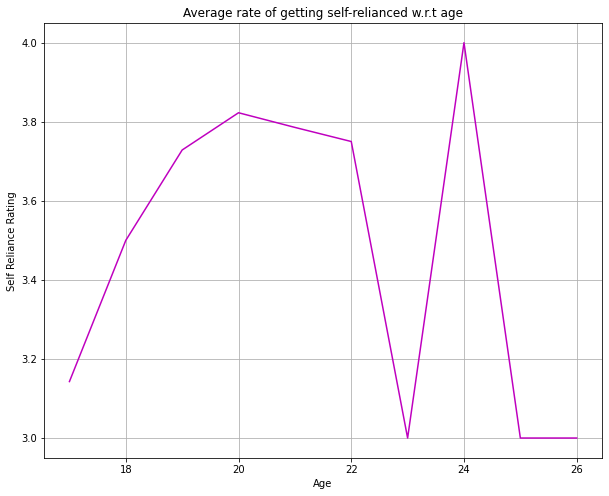

In [29]:
plt.figure(figsize=(10,8))
df.groupby(['Age'])["SelfReliance"].mean().plot.line(color="m")
plt.xlabel("Age")
plt.ylabel("Self Reliance Rating")
plt.title("Average rate of getting self-relianced w.r.t age")
plt.grid()

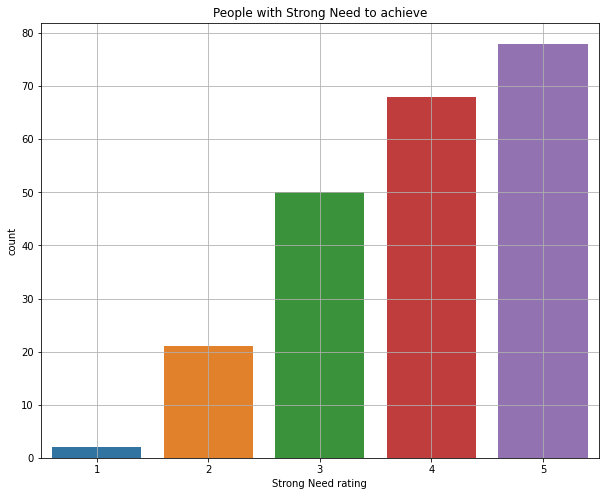

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x="StrongNeedToAchieve", data=df)
plt.xlabel("Strong Need rating")
plt.title("People with Strong Need to achieve")
plt.grid()

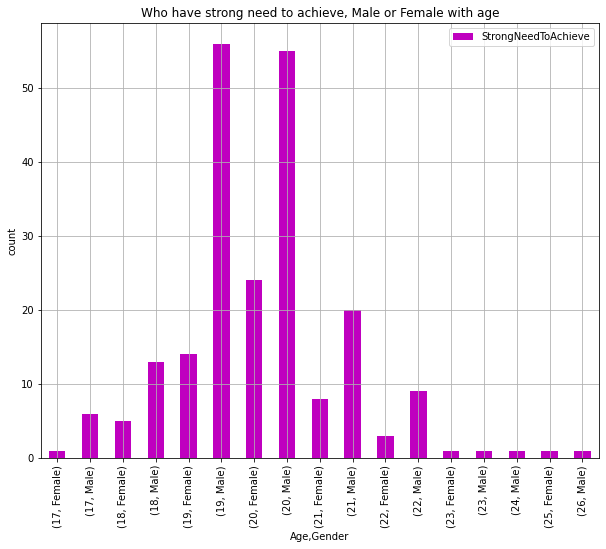

In [31]:
plt.figure(figsize=(10,8))
df.groupby(['Age','Gender'])["StrongNeedToAchieve"].count().plot.bar(color="m")
plt.ylabel("count")
plt.title("Who have strong need to achieve, Male or Female with age")
plt.grid()
plt.legend()

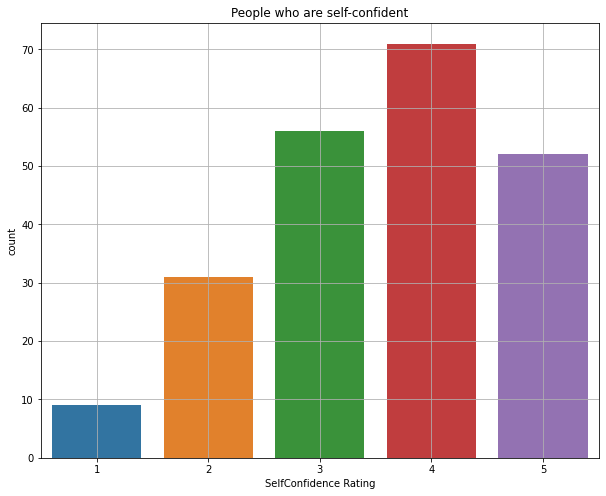

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x="SelfConfidence",data=df)
plt.title("People who are self-confident")
plt.xlabel("SelfConfidence Rating")
plt.grid()

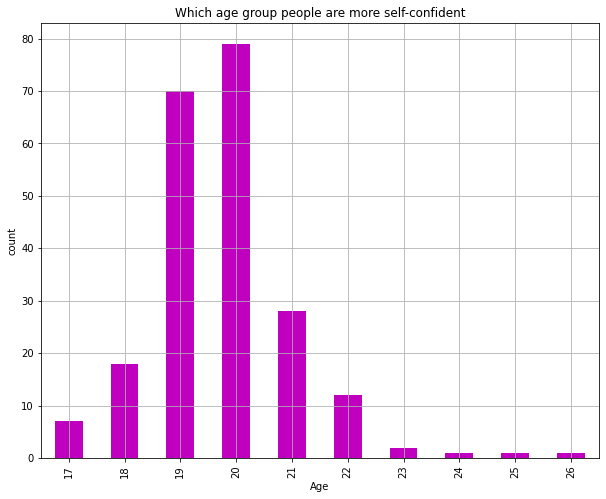

In [33]:
plt.figure(figsize=(10,8))
df.groupby(["Age"])["SelfConfidence"].count().plot.bar(color="m")
plt.ylabel("count")
plt.title("Which age group people are more self-confident")
plt.grid()

Text(0.5, 1.0, 'People having good physical health')

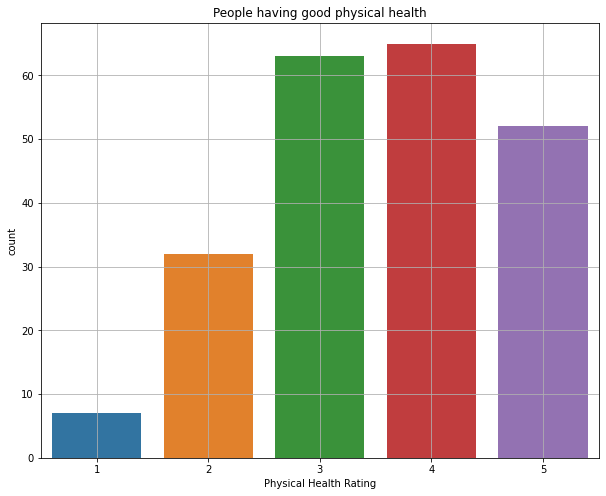

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x="GoodPhysicalHealth",data=df)
plt.grid()
plt.xlabel("Physical Health Rating")
plt.title("People having good physical health")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'People having good physical health')

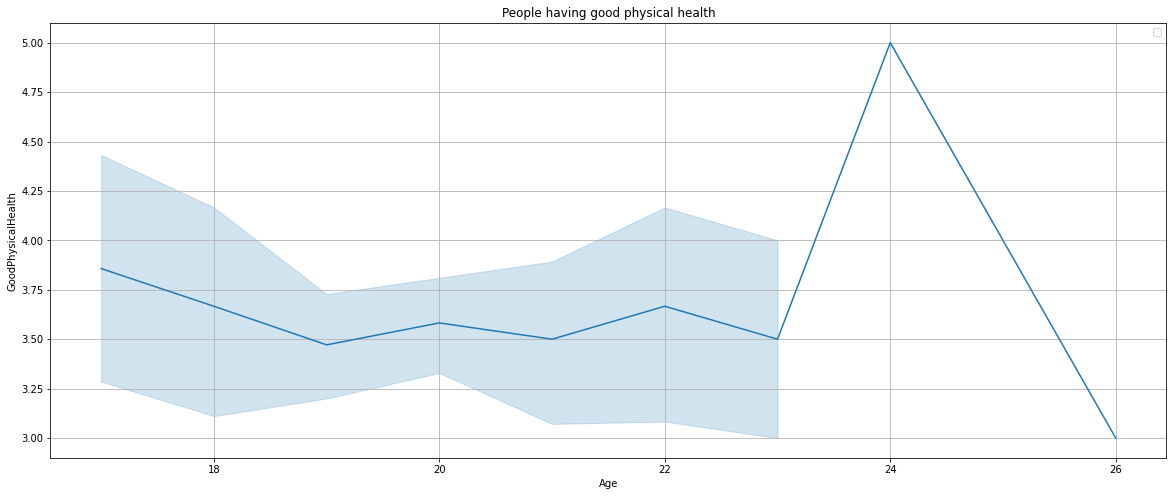

In [64]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Age",y="GoodPhysicalHealth",data=df)
plt.grid()
plt.xlabel("Age")
plt.legend(loc="upper right")
plt.title("People having good physical health")

[]

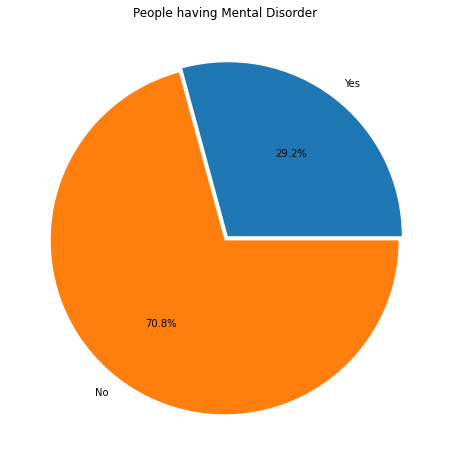

In [36]:
plt.figure(figsize=(10,8))
MentalDisorder = [df.MentalDisorder[df["MentalDisorder"]=="Yes"].count(), df.MentalDisorder[df["MentalDisorder"]=="No"].count()]
explode = [0.03,0]
label=["Yes", "No"]
plt.pie(MentalDisorder, explode=explode, labels=label, autopct="%0.1f%%")
plt.title("People having Mental Disorder")
plt.plot()

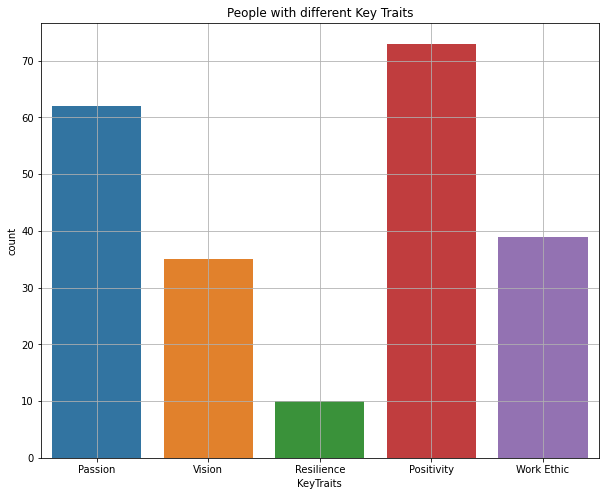

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x="KeyTraits", data=df)
plt.title("People with different Key Traits")
plt.grid()

### EDA Conclusions:
###### 1) Engineering Science Sector has highest number of students.
###### 2) Most of the students has done individual projects.
###### 3) Engineeing Science students are more tends to do individual project.
###### 4) Most students are of age 20 and above.
###### 5) Students of age 19-20 are more willing to do efforts to achive something.
###### 6) In males, most of the students are of age 19 and in females, most students are of age 20.
###### 7) More than 80% students resides in city.
###### 8) 45% students residing in city are of Engineering Science Sector.
###### 9) As the age increases more students are tends to influenced by others but after 20-21 less people get influenced by others.
###### 10) Males get highly influenced by others.
###### 11) It can be said that Engineering Sciecne students possess lowest and highest rating of perseverance than others.
###### 12) Most students possess perseverance after getting influenced by others.
###### 13) Almost 50% students are more desired in taking intiatives.
###### 14) Skill of Competitiveness increases with increase in age.
###### 15) Between age 18-22 students are self-relianced.
###### 16) Male of age 19-20 and Female of age 20-21 are more in need to achieve something.
###### 17) Students of Age 20 are more confident than the students of any other age.
###### 18) Almost 50% students posses physical health rating of 4-5.
###### 19) Students of age range 18-22 are tends to be more physically fit than others.
###### 20) 29.2% Students have mental disorder.
###### 21) Most of the students have Postitive Key Trait.

## Data Cleaning and Preprocessing

In [38]:
mldf = df.copy()

In [39]:
mldf.drop(columns=["EducationSector","Age","City","MentalDisorder","GoodPhysicalHealth"], inplace=True, axis=1)

Dropping those columns as they are not much contributing to the model-training and entrepreneurship skills.

In [41]:
lb = LabelEncoder()

In [42]:
def labelEncoding(colName):
    for col in colName:
        mldf[col] = lb.fit_transform(mldf[col])

In [43]:
labelEncoding(["Gender","IndividualProject", "Influenced", "KeyTraits"])

## Model Training, Cross Validation and Hyper-Parameter Tuning

In [45]:
mldf

,IndividualProject,Gender,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,KeyTraits,y
0,0,1,0,2,2,3,3,2,2,0,1
1,1,1,1,3,3,3,4,4,3,3,0
2,0,1,0,3,4,3,3,3,4,0,0
3,1,1,1,3,3,3,3,4,3,2,0
4,1,1,1,2,3,3,3,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
214,1,1,1,4,5,4,3,4,4,1,1
215,1,1,0,2,2,2,2,2,2,4,0
216,1,0,1,3,4,4,3,4,4,3,1
217,0,1,0,1,2,2,3,3,2,0,0


In [46]:
x = mldf.iloc[:,:-1]
y = mldf.iloc[:,-1]

In [47]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### HyperParameter Tuning

In [48]:
hp_params = {
    'svc':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20,30,40,50],
            'kernel':['rbf','linear','sigmoid','poly']
        }
    },
    'descisionTreeClassifier':{
        'model':DecisionTreeClassifier(splitter='best'),
        'params':{
            'criterion':['gini','entropy'],
        }
    },
    'LogisticReg':{
        'model':LogisticRegression(),
        'params':{
            'solver':['saga','sag','liblinear'],
            'C':[1,10,20,30,40,50]
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'n_estimators':[1,10,20,30,40,50]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(algorithm='auto'),
        'params':{
            'n_neighbors':[1,2,3,4,5],
            'weights':['uniform','distance']
        }
    }
    
}

In [49]:
score = []
for model_name, model_params in hp_params.items():
    gscv = GridSearchCV(model_params['model'],model_params['params'],cv=20)
    gscv.fit(x_train,y_train)
    pred = gscv.predict(x_test)
    score.append({
        'model_name':model_name,
        'best_score':gscv.best_score_,
        'best_params':gscv.best_params_,
        'test_accuracy': accuracy_score(pred, y_test),
        'f1_score':f1_score(pred, y_test),
        'r2_score':r2_score(pred, y_test),
    })
    
best_params = pd.DataFrame(score, columns=['model_name', 'best_score', 'best_params','test_accuracy','f1_score','r2_score'])

In [50]:
best_params

,model_name,best_score,best_params,test_accuracy,f1_score,r2_score
0,svc,0.596528,"{'C': 10, 'kernel': 'sigmoid'}",0.590909,0.000000,0.000000
1,descisionTreeClassifier,0.568056,{'criterion': 'entropy'},0.750000,0.645161,-0.200993
2,LogisticReg,0.561111,"{'C': 10, 'solver': 'liblinear'}",0.477273,0.303030,-1.326437
3,RandomForest,0.577083,"{'criterion': 'entropy', 'n_estimators': 40}",0.659091,0.482759,-0.818182
4,knn,0.548611,"{'n_neighbors': 2, 'weights': 'uniform'}",0.704545,0.434783,-1.933333


### Model-Training Conclusions:
###### Decision Tree Classifier is best model with 75% test accuracy.
###### Best Parameters are: splliter="best", criterion="entropy"
###### f1_score =>  0.645
###### r2_score => -0.2